In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/ford_tweets.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416795018883371009,1416795018883371008,2021-07-18 21:50:29 India Standard Time,2021-07-18,21:50:29,530,2809959174,fordnation,Doug Ford,,...,,,,,,[],,,,
1,1416497187131908099,1416497187131908096,2021-07-18 02:07:01 India Standard Time,2021-07-18,02:07:01,530,2809959174,fordnation,Doug Ford,,...,,,,,,[],,,,
2,1416143670282231812,1416143670282231808,2021-07-17 02:42:16 India Standard Time,2021-07-17,02:42:16,530,2809959174,fordnation,Doug Ford,,...,,,,,,[],,,,


In [4]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['I', 'want', 'to', 'send', 'out', 'a', 'big', 'THANK', 'YOU', 'to', 'our', 'frontline', 'vaccination', 'heroes.', 'You', 'are', 'absolute', 'champions', 'and', 'the', 'numbers', 'speak', 'for', 'themselves...', '✅18', 'million', 'vaccines', 'administered', 'Vaccinations', 'for', 'Ontarians', 'over', 'age', '12:', '✅78%+', 'have', 'had', 'at', 'least', 'one', 'dose', '✅60%+', 'have', 'had', 'two', 'doses', 'Nothing', 'pulls', 'a', 'community', 'together', 'more', 'than', 'a', 'community', 'centre.', 'It’s', 'a', 'place', 'that', 'people', 'can', 'come,', 'bring', 'their', 'family', 'and', 'friends', 'and', 'get', 'together.', 'I', "can't", 'wait', 'to', 'be', 'back', 'in', '#Scarborough', 'and', 'get', 'shovels', 'in', 'the', 'ground', 'for', 'the', 'new', '#Tamil', 'Community', 'Centre.', 'https://t.co/rwAOezk0oW', 'It', 'was', 'a', 'pleasure', 'to', 'be', 'in', '#Scarborough', 'this', 'morning', 'with', 'Minister', '@KingaSurmaMPP,', '@VijayThaniMPP', 'and', '@LoganKanapathi', 'to', 

In [5]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [6]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['i',
 'want',
 'to',
 'send',
 'out',
 'a',
 'big',
 'thank',
 'you',
 'to',
 'our',
 'frontlin',
 'vaccin',
 'hero',
 'you',
 'are',
 'absolut',
 'champion',
 'and',
 'the',
 'number',
 'speak',
 'for',
 'themselv',
 '18',
 'million',
 'vaccin',
 'administ',
 'vaccin',
 'for',
 'ontarian',
 'over',
 'age',
 '12',
 '78',
 'have',
 'had',
 'at',
 'least',
 'one',
 'dose',
 '60',
 'have',
 'had',
 'two',
 'dose',
 'noth',
 'pull',
 'a',
 'communiti',
 'togeth',
 'more',
 'than',
 'a',
 'communiti',
 'centr',
 'it',
 'a',
 'place',
 'that',
 'peopl',
 'can',
 'come',
 'bring',
 'their',
 'famili',
 'and',
 'friend',
 'and',
 'get',
 'togeth',
 'i',
 'cant',
 'wait',
 'to',
 'be',
 'back',
 'in',
 'scarborough',
 'and',
 'get',
 'shovel',
 'in',
 'the',
 'ground',
 'for',
 'the',
 'new',
 'tamil',
 'communiti',
 'centr',
 'httpstcorwaoezk0ow',
 'it',
 'was',
 'a',
 'pleasur',
 'to',
 'be',
 'in',
 'scarborough',
 'this',
 'morn',
 'with',
 'minist',
 'kingasurmampp',
 'vijaythanimpp',
 'a

In [7]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['want',
 'send',
 'big',
 'thank',
 'frontlin',
 'vaccin',
 'hero',
 'absolut',
 'champion',
 'number',
 'speak',
 'themselv',
 '18',
 'million',
 'vaccin',
 'administ',
 'vaccin',
 'ontarian',
 'age',
 '12',
 '78',
 'dose',
 '60',
 'dose',
 'noth',
 'pull',
 'communiti',
 'togeth',
 'communiti',
 'centr',
 'place',
 'peopl',
 'come',
 'bring',
 'famili',
 'friend',
 'togeth',
 'cant',
 'wait',
 'scarborough',
 'shovel',
 'ground',
 'new',
 'tamil',
 'communiti',
 'centr',
 'httpstcorwaoezk0ow',
 'pleasur',
 'scarborough',
 'morn',
 'minist',
 'kingasurmampp',
 'vijaythanimpp',
 'logankanapathi',
 'announc',
 'invest',
 '12m',
 'support',
 'construct',
 'tamil',
 'communiti',
 'centr',
 'thank',
 'partner',
 'help',
 'realiti',
 'httpstcofmhcyoos9k',
 'becaus',
 'effort',
 'light',
 'end',
 'tunnel',
 'grow',
 'brighter',
 'everyday',
 'continu',
 'cautious',
 'reopen',
 'thing',
 'miss',
 'pleas',
 'stay',
 'safe',
 'vaccin',
 'supportloc',
 'httpstcoh1aicohicx',
 '18339433900',
 'ht

In [8]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [9]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 922, 2: 222, 3: 100, 4: 70, 5: 39, 6: 36, 7: 24, 8: 22, 10: 15, 9: 11, ...})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


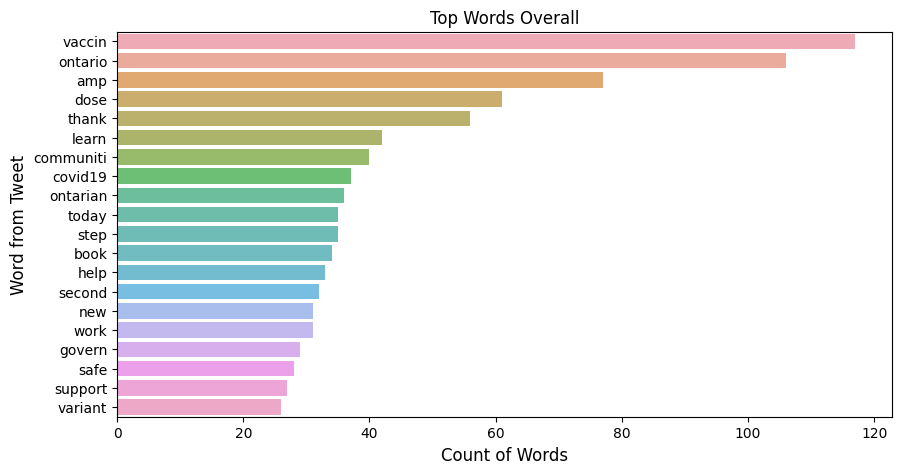

In [11]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [12]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [14]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


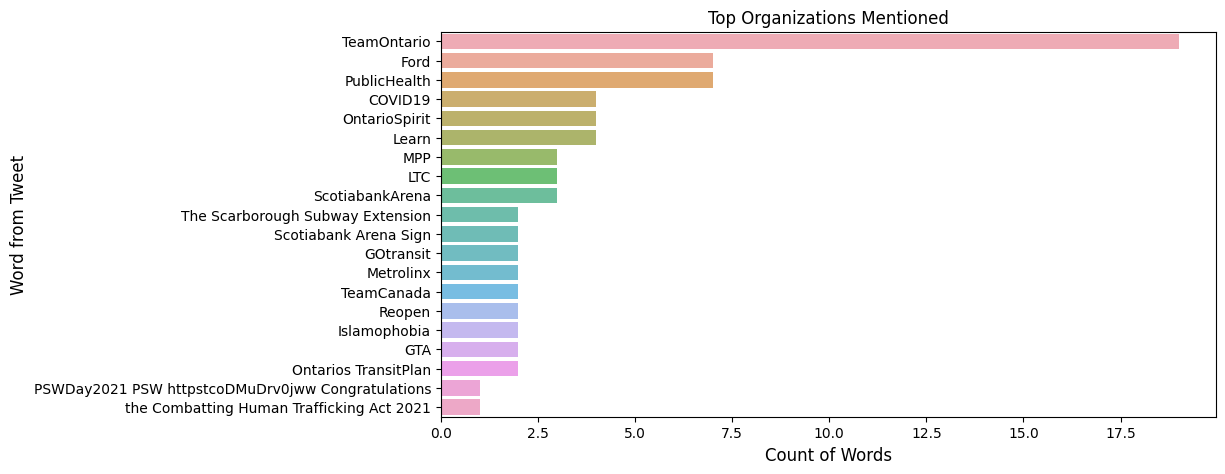

In [15]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [17]:
df.to_csv("doug_ford_word_count.csv")